In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [2]:
#preprocessing
wdbc = pd.read_csv("data.csv")
wdbc = wdbc.drop("Unnamed: 32", axis = 1)
#creating usable binary classification column
wdbc["diagnosis_binary"] = wdbc["diagnosis"].replace(["M", "B"], [1, 0])
#adjusting column names 
wdbc.columns = wdbc.columns.str.replace(' ', '_')
print(wdbc.shape)
wdbc.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

<AxesSubplot:ylabel='percentage'>

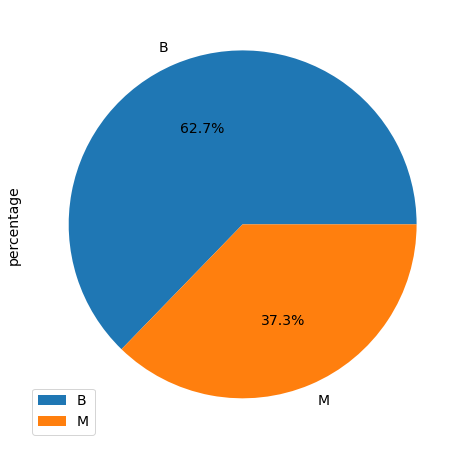

In [4]:
#univariate pi chart of diagnosis
(wdbc[["diagnosis", "id"]].groupby("diagnosis").count() / wdbc.shape[0]).rename(columns = {"id":"percentage"}).plot.pie(y="percentage",autopct='%1.1f%%')
#wdbc.diagnosis.plot.pie()

Text(0.5, 1.0, 'Correlation Heatmap')

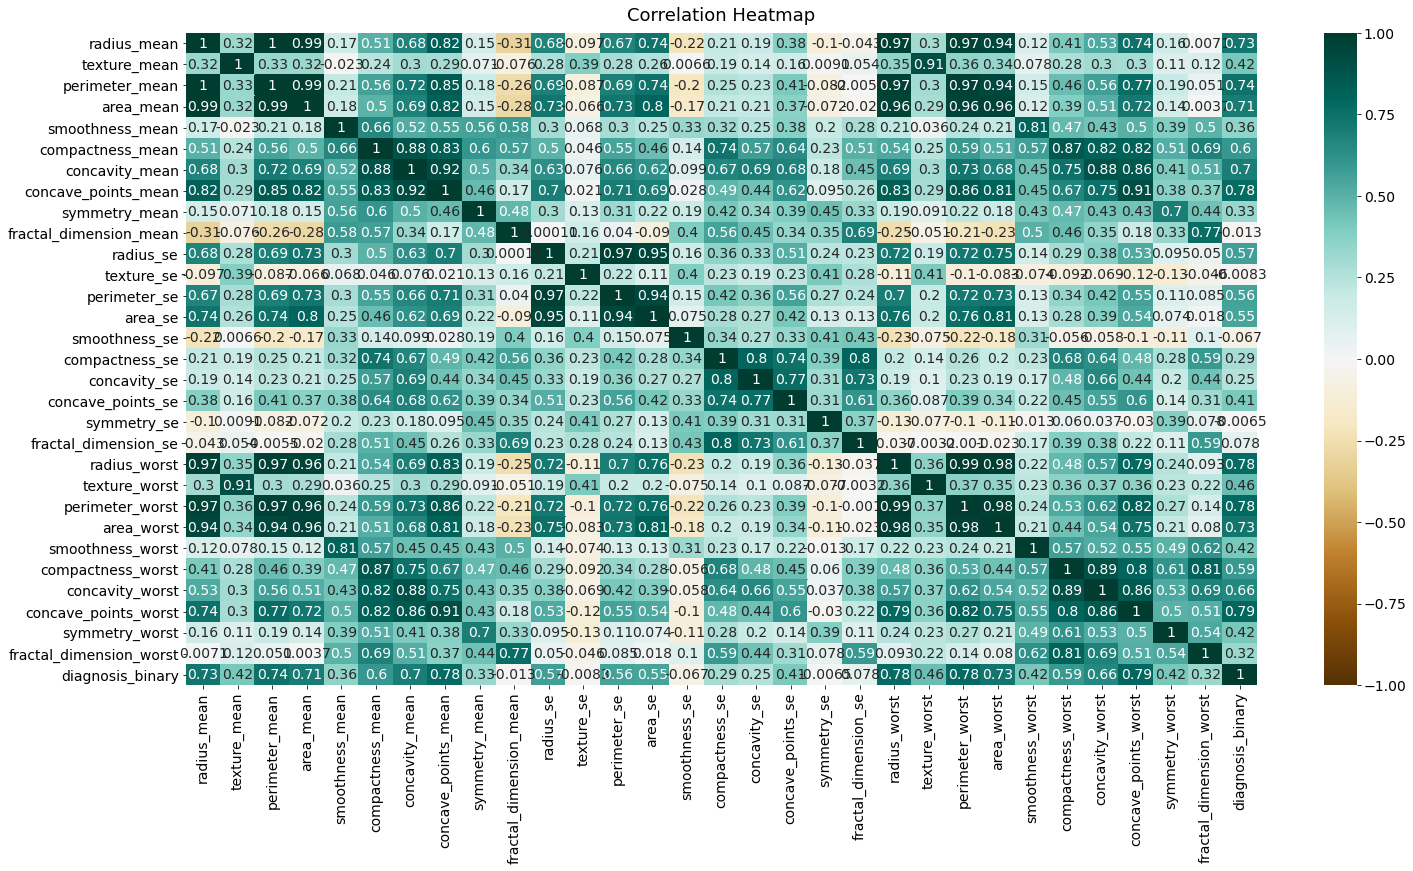

In [5]:
#use .tight_layout() for formatting
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(wdbc.drop("id", axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

[Text(0.5, 1.0, 'Malignant vs. Benign Perimeter Distributions')]

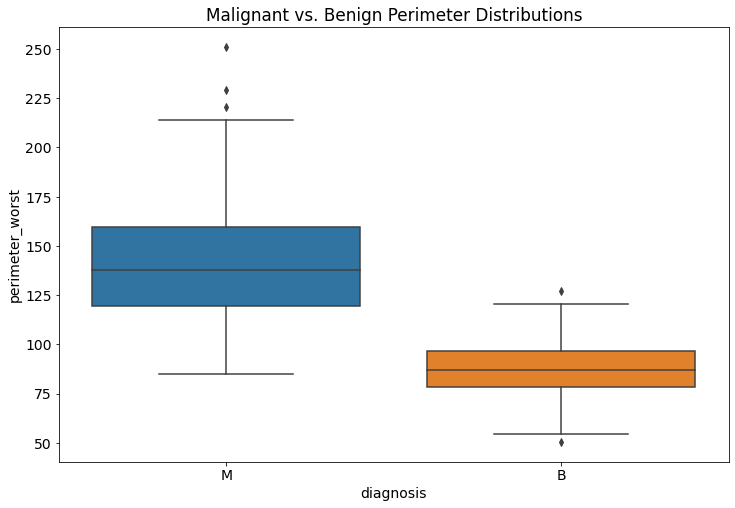

In [6]:
#EDA
sns.boxplot(x="diagnosis", y="perimeter_worst", data=wdbc).set(title="Malignant vs. Benign Perimeter Distributions")

[Text(0.5, 1.0, 'Malignant vs. Benign Radius Distributions')]

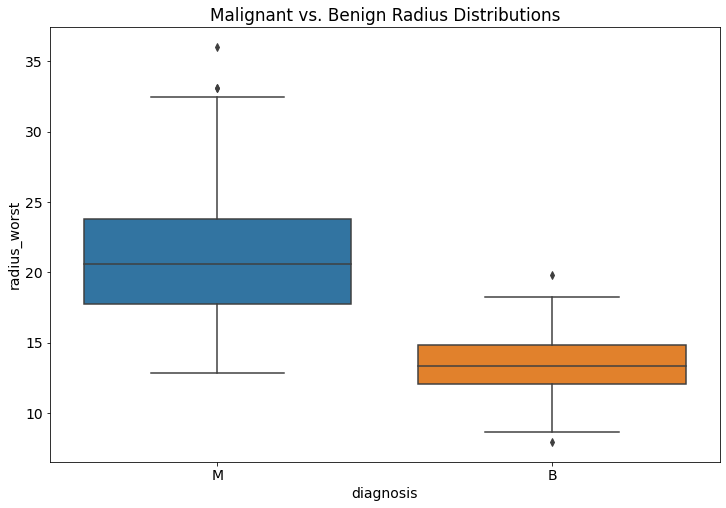

In [7]:
sns.boxplot(x="diagnosis", y="radius_worst", data=wdbc).set(title="Malignant vs. Benign Radius Distributions")

[Text(0.5, 1.0, 'Malignant vs. Benign Area Distributions')]

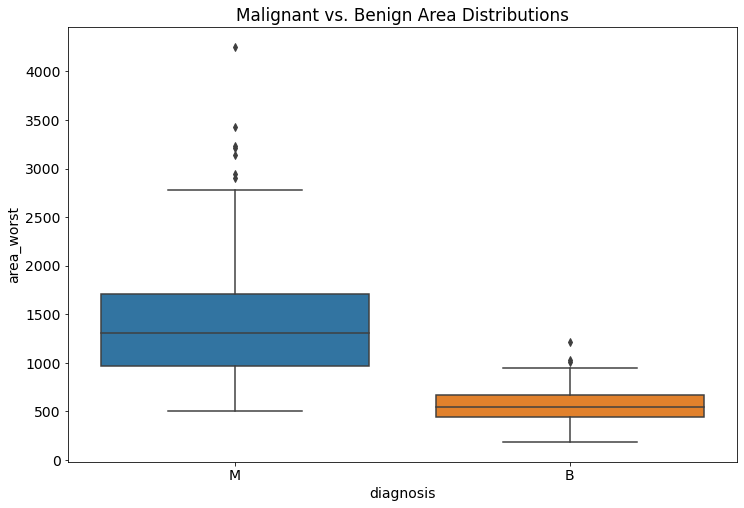

In [8]:
sns.boxplot(x="diagnosis", y="area_worst", data=wdbc).set(title="Malignant vs. Benign Area Distributions")

In [9]:
#
X = wdbc.drop(["diagnosis", "diagnosis_binary", "id"], axis=1)
y = wdbc["diagnosis_binary"]

In [10]:
#fitting RF for feature importance
rf1 = RandomForestClassifier(n_estimators=100)
#for loop through models using dictionary
#rf_dict = {"fifty":RandomForestClassifier()}
#rf_fifty = rf.fit(X_train, y_train)
rf1.fit(X, y)

RandomForestClassifier()

No handles with labels found to put in legend.


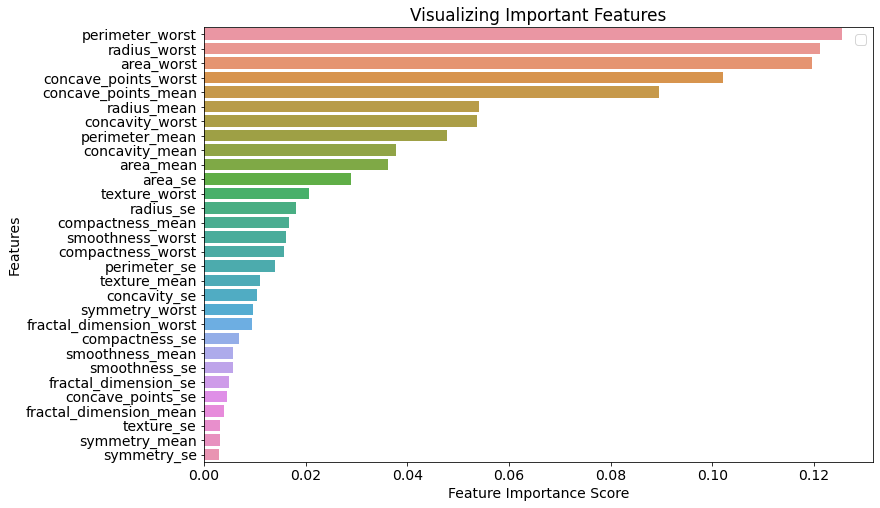

In [11]:
feature_imp = pd.Series(rf1.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [12]:
from scipy import stats 
Sample_M = wdbc[wdbc.diagnosis == "M"].area_worst
Sample_B = wdbc[wdbc.diagnosis == "B"].area_worst
t_result = stats.ttest_ind(Sample_M, Sample_B)

t_result

Ttest_indResult(statistic=25.721590260589004, pvalue=2.828847704286693e-97)

In [13]:
Sample_M = wdbc[wdbc.diagnosis == "M"].perimeter_worst
Sample_B = wdbc[wdbc.diagnosis == "B"].perimeter_worst
t_result = stats.ttest_ind(Sample_M, Sample_B)
t_result

Ttest_indResult(statistic=29.965717392710303, pvalue=5.771397139668621e-119)

In [14]:
Sample_M = wdbc[wdbc.diagnosis == "M"].radius_worst
Sample_B = wdbc[wdbc.diagnosis == "B"].radius_worst
t_result = stats.ttest_ind(Sample_M, Sample_B)
t_result

Ttest_indResult(statistic=29.33908156342075, pvalue=8.482291921684414e-116)

In [15]:
from sklearn.preprocessing import RobustScaler
X_scaled = pd.DataFrame(RobustScaler().fit_transform(X))
X_scaled.columns = X.columns
wdbc_scaled = X_scaled
wdbc_scaled["diagnosis_binary"] = y
wdbc_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578,1
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500,1
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664,1
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244,1
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.007353,0.630551,1.927411,2.560430,0.799260,0.355376,1.803045,1.963122,-0.195266,-0.630641,...,0.114583,1.657544,2.357130,0.329932,-0.003127,0.685544,1.261221,-1.128889,-0.431135,1
565,1.656863,1.671403,1.554096,1.958885,0.101955,0.164478,0.815306,1.199665,-0.118343,-0.737530,...,1.486111,1.388714,1.836645,-0.500000,-0.102658,0.353204,0.651705,-0.370370,-0.662949,1
566,0.791667,1.641208,0.762530,0.847130,-0.597993,0.147679,0.306209,0.363569,-0.597633,-0.600950,...,1.008102,0.703318,0.769298,-0.591837,0.508077,0.423249,0.434021,-0.894815,-0.089234,1
567,1.772059,1.863233,1.861735,1.969923,1.158479,2.815669,2.865928,2.207115,1.789941,1.023753,...,1.621528,2.105595,1.994901,1.146259,3.419489,2.652757,1.711102,1.874074,2.131911,1


Text(0.5, 1.0, 'Correlation Heatmap')

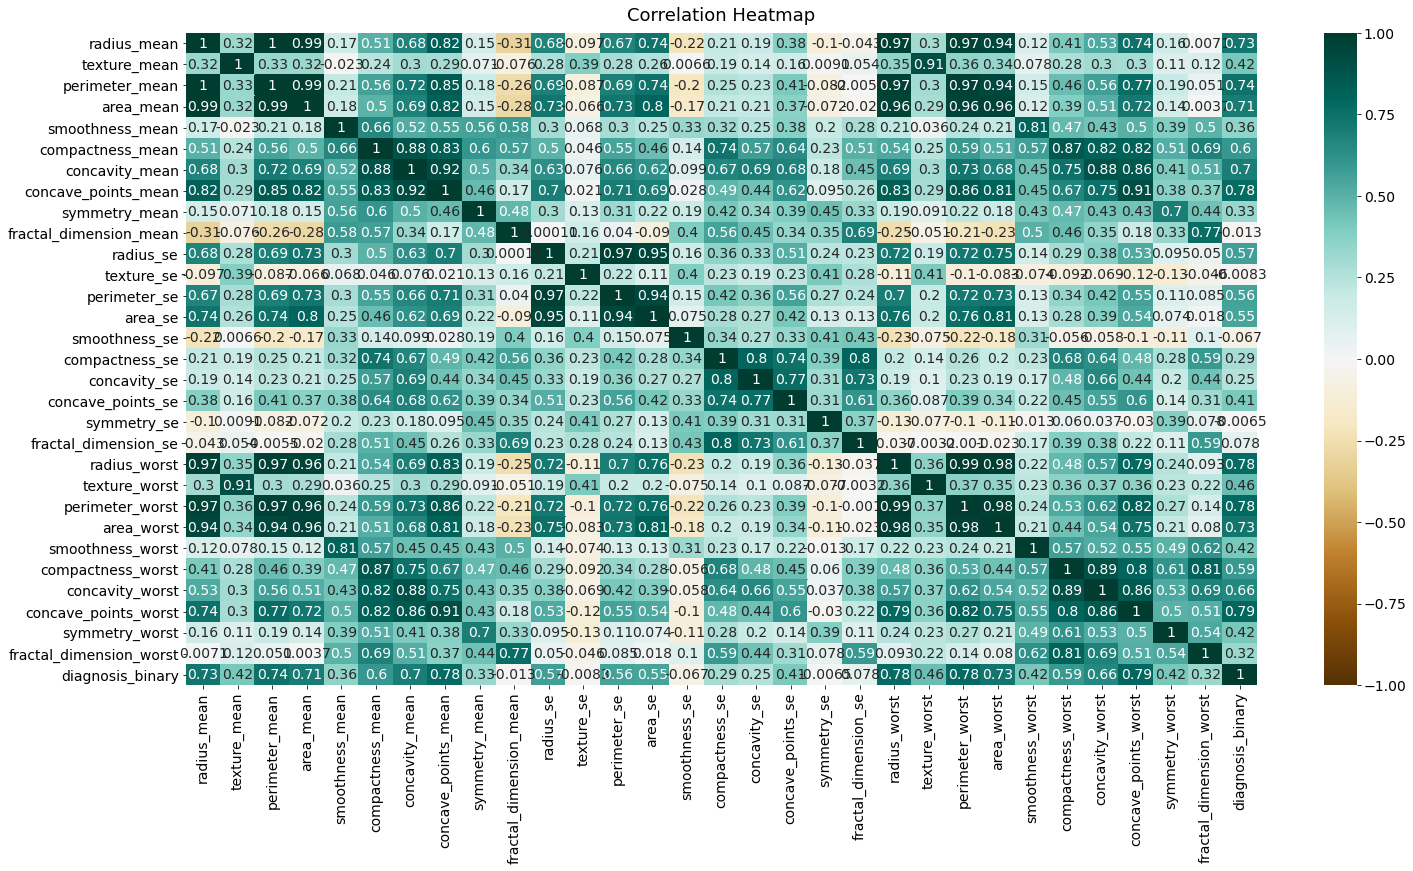

In [16]:
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(X_scaled.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [17]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
#gather features
#perimeter_worst
features_pw = wdbc.columns.drop(["diagnosis", "diagnosis_binary", "id", "radius_mean", "perimeter_mean", "area_mean",
                                    "area_worst", "perimeter_se", "area_se", "radius_se", "radius_worst", "concave_points_mean",
                                    "compactness_worst", "concavity_mean", "concave_points_worst", "texture_worst",
                                    "compactness_mean", "concavity_worst"])
features_cpw = wdbc.columns.drop(["diagnosis", "diagnosis_binary", "id", "concave_points_mean", "area_worst", 
                                    "perimeter_worst", "radius_worst", "perimeter_mean", "area_mean", "radius_mean", 
                                    "compactness_worst", "radius_se", "concavity_mean", "concavity_worst", "texture_worst",
                                    "perimeter_se", "compactness_mean"])
features_aw = wdbc.columns.drop(["diagnosis", "diagnosis_binary", "id", "radius_mean", "perimeter_mean", "area_mean",
                                    "perimeter_worst", "radius_worst", "concavity_mean", "compactness_worst", "radius_se",
                                    "concave_points_worst", "compactness_mean", "texture_worst", "area_se", 
                                    "concavity_worst"])
features_rw = (wdbc.columns.drop(["diagnosis", "diagnosis_binary", "id", "radius_mean", "perimeter_mean", "area_mean",
                                    "area_worst", "perimeter_worst", "concavity_mean", "compactness_worst", "radius_se",
                                    "concave_points_worst", "compactness_mean", "texture_worst", "concavity_worst",
                                    "perimeter_se", "concave_points_mean"]))
features_all = (wdbc.columns.drop(["diagnosis", "diagnosis_binary", "id"]))

# get y and X dataframes based on this regression:
y2, X2 = dmatrices('diagnosis_binary ~' + "+".join(features_aw), wdbc_scaled, return_type='dataframe')

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.round(1)

,VIF Factor,features
0,1.6,Intercept
1,1.7,texture_mean
2,6.6,smoothness_mean
3,9.0,concave_points_mean
4,3.7,symmetry_mean
5,7.2,fractal_dimension_mean
6,2.0,texture_se
7,4.3,perimeter_se
8,3.2,smoothness_se
9,5.9,compactness_se


In [20]:
sm.add_constant(X2)
log_reg = sm.Logit(y2, X2).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.053062
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:       diagnosis_binary   No. Observations:                  569
Model:                          Logit   Df Residuals:                      551
Method:                           MLE   Df Model:                           17
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.9196
Time:                        14:57:57   Log-Likelihood:                -30.192
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                6.921e-136
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.5253      0.796     -5.682      0.000      -6.086  

AUC scores computed perimeter_worst: 0.988987911101406


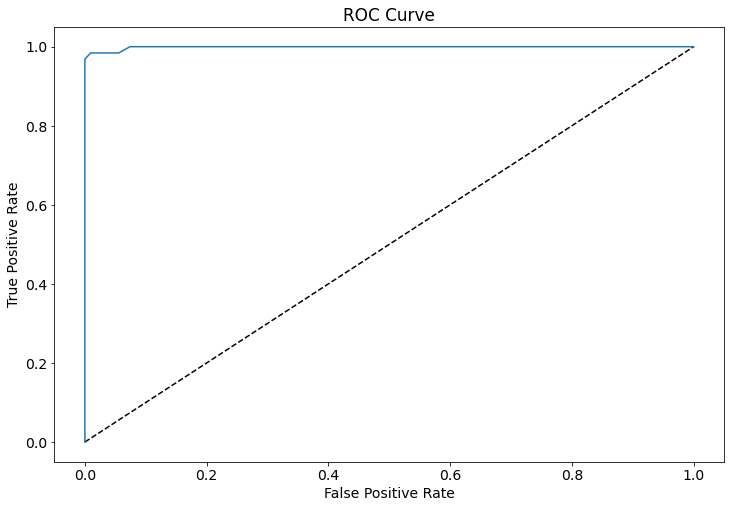

AUC scores computed area_worst: 0.9915916255500272


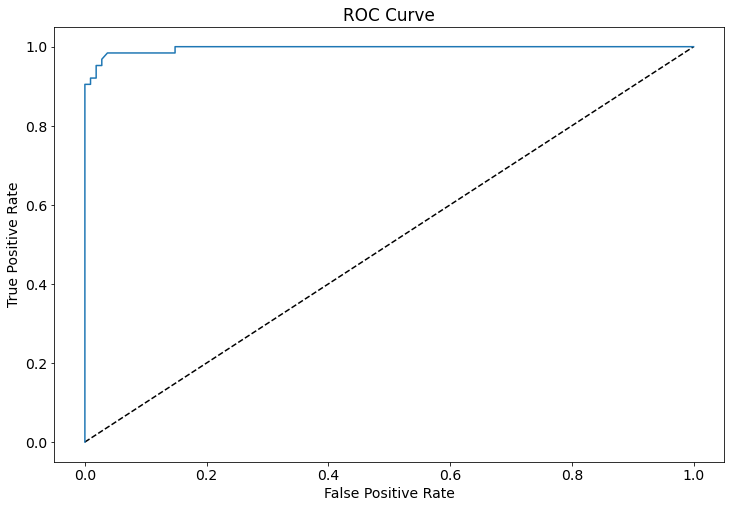

AUC scores computed radius_worst: 0.9919619352636058


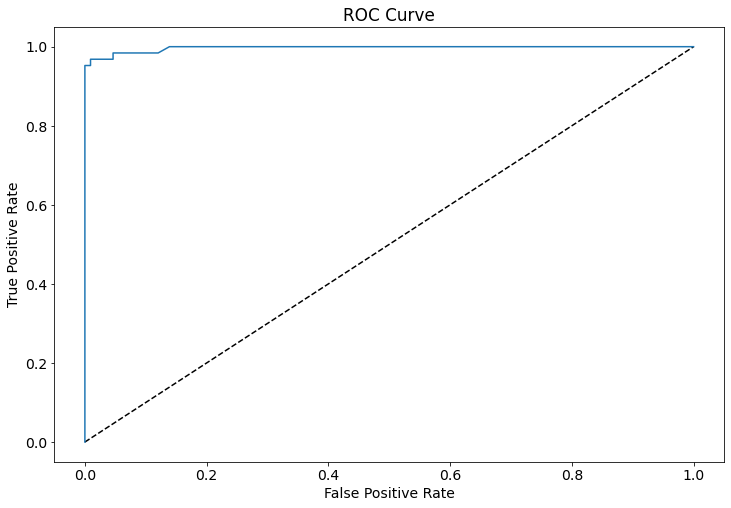

AUC scores computed concave_points_worst: 0.990020863770045


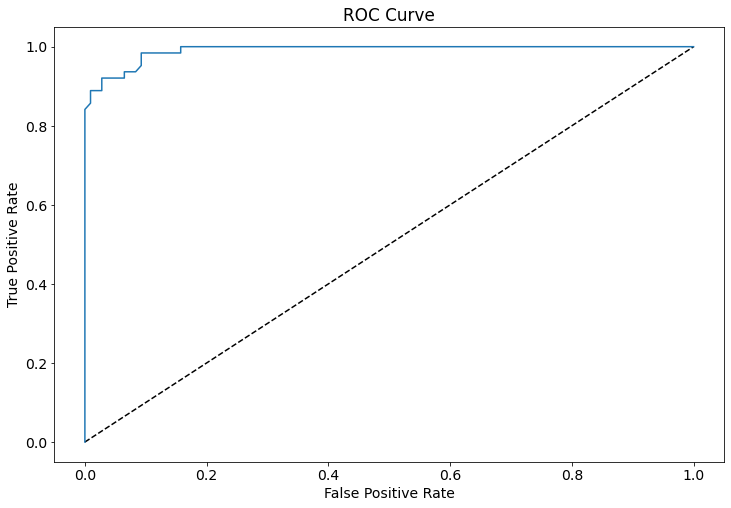

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .3, 
                                                    random_state=42)
feature_sets = {"perimeter_worst":features_pw, "area_worst":features_aw, "radius_worst":features_rw, "concave_points_worst":features_cpw}
for key in feature_sets:
    rf = RandomForestClassifier(n_estimators=100)
    rf = rf.fit(X_train[feature_sets[key]], y_train)
    y_pred_prob = rf.predict_proba(X_test[feature_sets[key]])[:, 1]
    roc_auc_score(y_test, y_pred_prob)
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    cv_auc = cross_val_score(rf, X_scaled[feature_sets[key]], y, cv = 5, scoring="roc_auc")
    print("AUC scores computed {}: {}".format(key, np.mean(cv_auc)))
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

Tuned RandomForest Parameters: {'n_estimators': 1600}
Best score is 0.9899477363359137


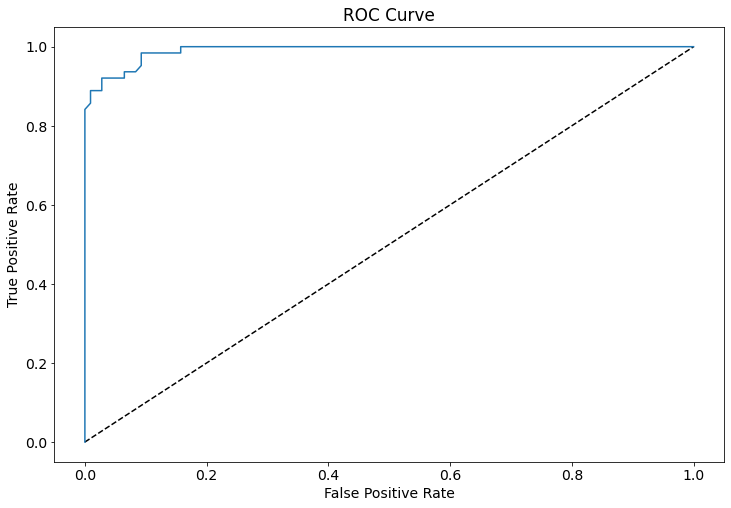

In [33]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
param_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, scoring = "roc_auc", param_grid = param_grid, cv=5, n_jobs = -1)
rf_cv.fit(X_train[feature_sets["area_worst"]], y_train)
y_pred_prob = rf_cv.predict_proba(X_test[feature_sets["area_worst"]])[:, 1]

# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

tuned hpyerparameters :(best parameters)  {'C': 0.4393970560760795}
Best score is 0.9937977011494252


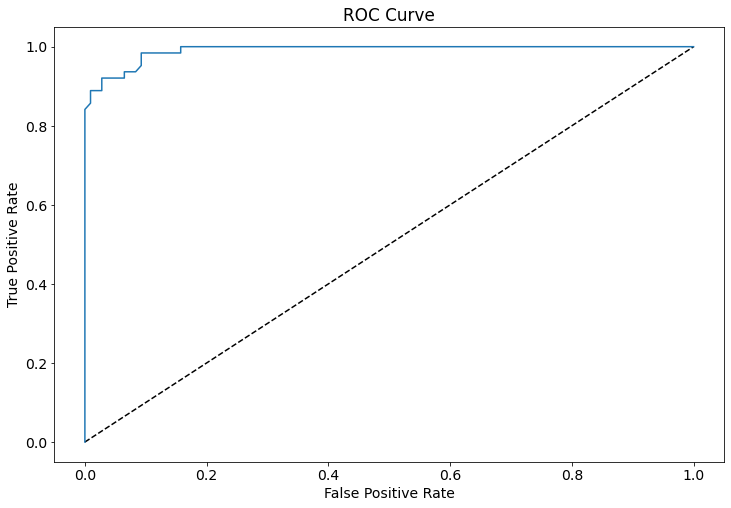

In [23]:
from sklearn.linear_model import LogisticRegression
param_grid={"C":np.logspace(-5, 8, 15)}
logreg=LogisticRegression(solver='lbfgs', max_iter = 400)
logreg_cv=GridSearchCV(logreg, scoring = "roc_auc", param_grid = param_grid,cv=5)
logreg_cv.fit(X_train[feature_sets["area_worst"]],y_train)
y_pred_prob = logreg_cv.predict_proba(X_test[feature_sets["area_worst"]])[:, 1]

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Best score is {}".format(logreg_cv.best_score_))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

tuned hyperparameteres: (best parameters)  {'C': 0.1}
Best score is 0.9929830635702558


C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Justin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the n

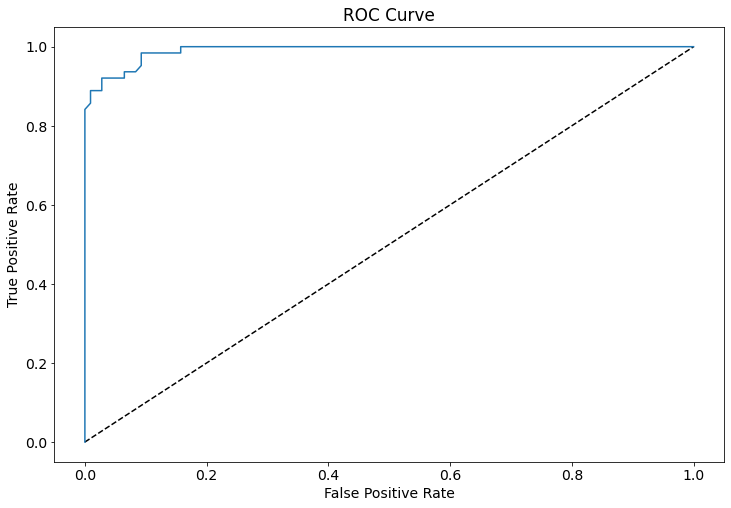

In [24]:
from sklearn.svm import LinearSVC
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
clf = LinearSVC()
clf_cv = GridSearchCV(clf, scoring = "roc_auc", param_grid = param_grid, cv = 5)
clf_cv.fit(X_train[feature_sets["area_worst"]], y_train)
y_pred_prob = clf_cv.decision_function(X_test[feature_sets["area_worst"]])

print("tuned hyperparameteres: (best parameters) ", clf_cv.best_params_)
print("Best score is {}".format(clf_cv.best_score_))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

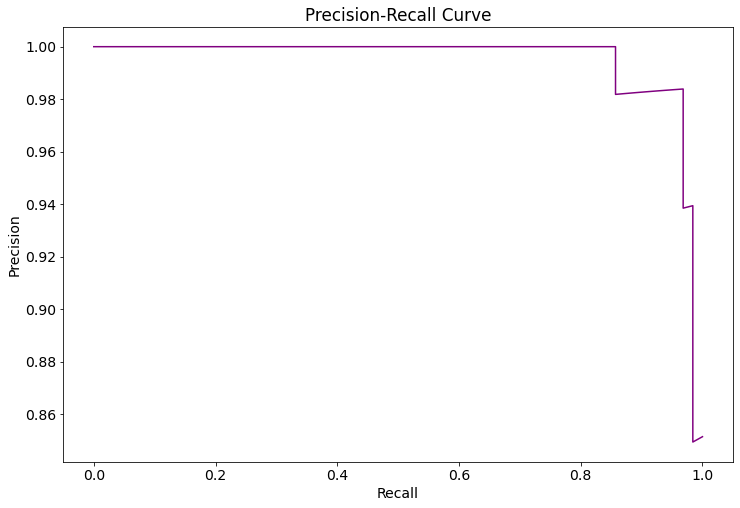

In [25]:
from sklearn.metrics import precision_recall_curve
y_proba = logreg_cv.predict_proba(X_test[feature_sets["area_worst"]])[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

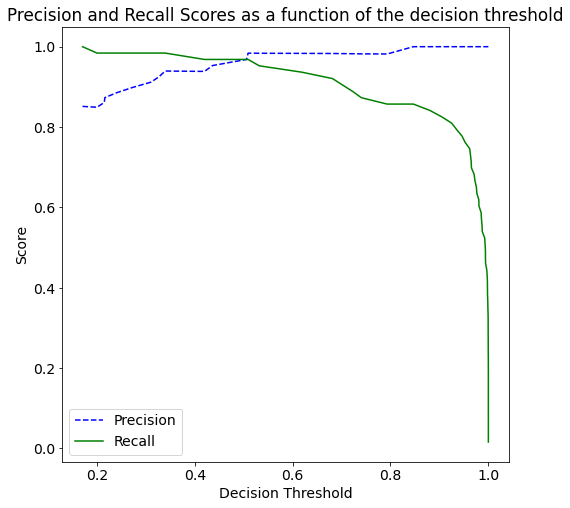

In [26]:
plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
y_pred = pd.DataFrame()
y_pred["predictions"] = y_proba > .15
f1_score(y_test, y_pred)

0.9197080291970803

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       108
           1       0.85      1.00      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.95      0.94      0.94       171



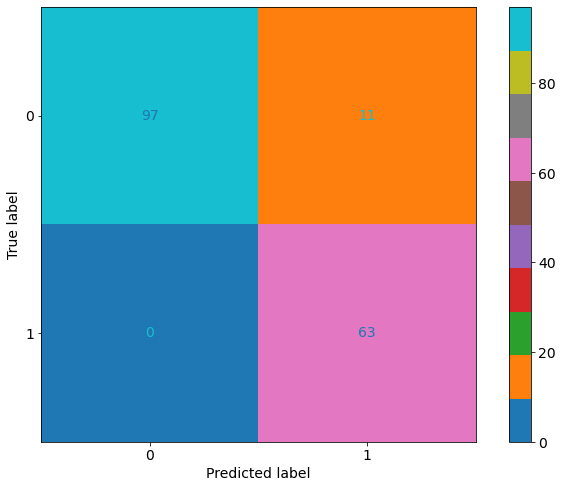

In [32]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap= 'tab10'))
